In [58]:
import numpy as np
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
import phate
import pandas as pd
from sklearn.cluster import KMeans

In [59]:
adata = sc.read_h5ad('../data/pseudotime.h5ad')

<Axes: >

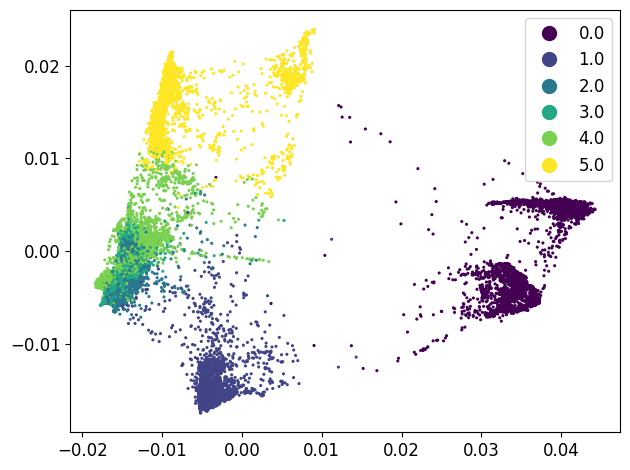

In [60]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['bin'], cmap='viridis')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    1494
1    1002
2     333
dtype: int64

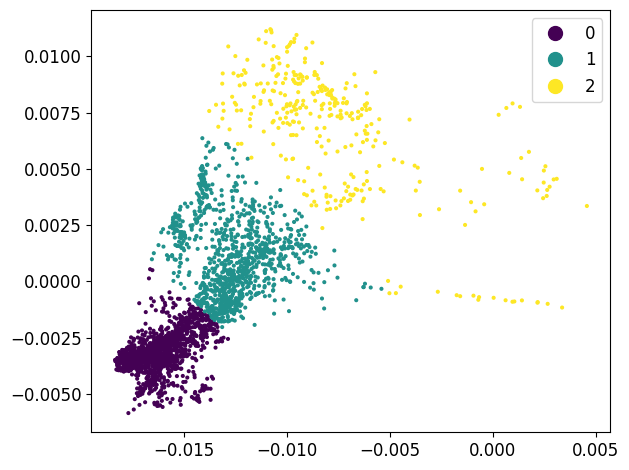

In [61]:
t = 4
bin_subsubsampled_ = adata[adata.obs['bin'] == t].copy()
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bin_subsubsampled_.obsm['X_phate'])
bin_subsubsampled_.obs['cluster'] = kmeans.labels_
scprep.plot.scatter2d(bin_subsubsampled_.obsm['X_phate'], bin_subsubsampled_.obs['cluster'], cmap='viridis')
pd.Series(kmeans.labels_).value_counts()


In [62]:
adata.obs.loc[bin_subsubsampled_.obs_names[bin_subsubsampled_.obs['cluster'] == 2], 'bin'] = 5

<Axes: >

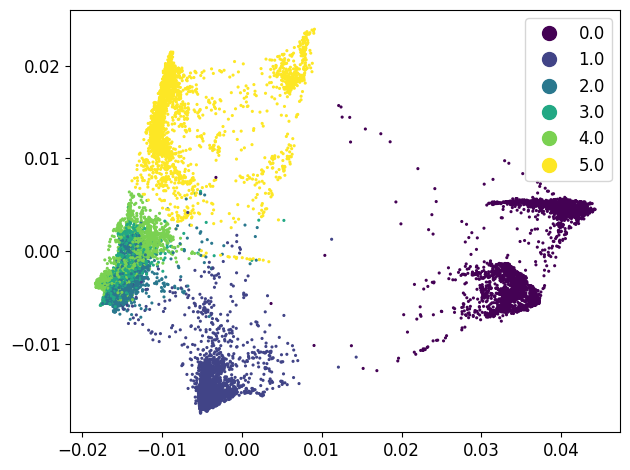

In [63]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['bin'], cmap='viridis')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    2601
1     229
dtype: int64


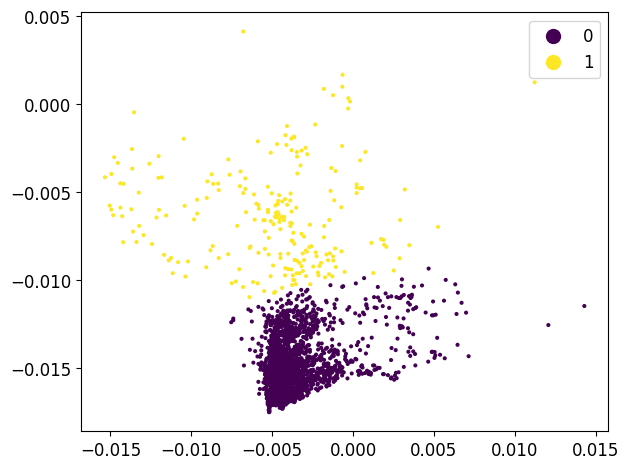

In [64]:
t = 1
bin_adata = adata[adata.obs['bin'] == t].copy()
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bin_adata.obsm['X_phate'])
bin_adata.obs['cluster'] = kmeans.labels_
scprep.plot.scatter2d(bin_adata.obsm['X_phate'], bin_adata.obs['cluster'], cmap='viridis')
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print(cluster_counts)

In [65]:
# refine pseudotime
# adata.obs.loc[bin_adata[bin_adata.obs['cluster'] == 1].obs_names, 'bin'] = 2

In [66]:
adata.obs.loc[adata.obs['bin'] == 3, 'bin'] = 2
adata.obs.loc[adata.obs['bin'] == 4, 'bin'] = 2
adata.obs.loc[adata.obs['bin'] == 5, 'bin'] = 3

<Axes: >

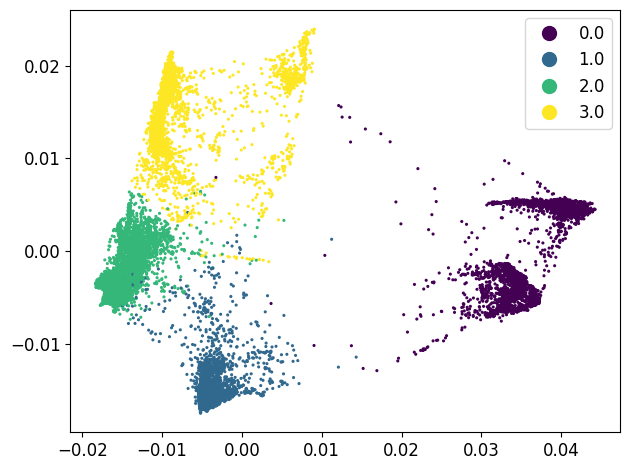

In [67]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['bin'], cmap='viridis')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    1368
3     939
1     365
2     350
4     141
dtype: int64


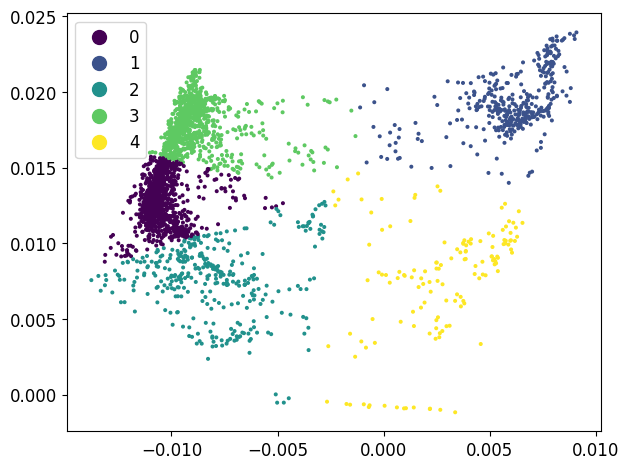

In [68]:
t = 3
bin_adata = adata[adata.obs['bin'] == t].copy()
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bin_adata.obsm['X_phate'])
bin_adata.obs['cluster'] = kmeans.labels_
scprep.plot.scatter2d(bin_adata.obsm['X_phate'], bin_adata.obs['cluster'], cmap='viridis')
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print(cluster_counts)

In [69]:
# adata.obs.loc[bin_adata[bin_adata.obs['cluster'].isin([0,1,3])].obs_names, 'bin'] = 4
# adata.obs.loc[bin_adata[bin_adata.obs['cluster'].isin([4])].obs_names, 'bin'] = 2

<Axes: >

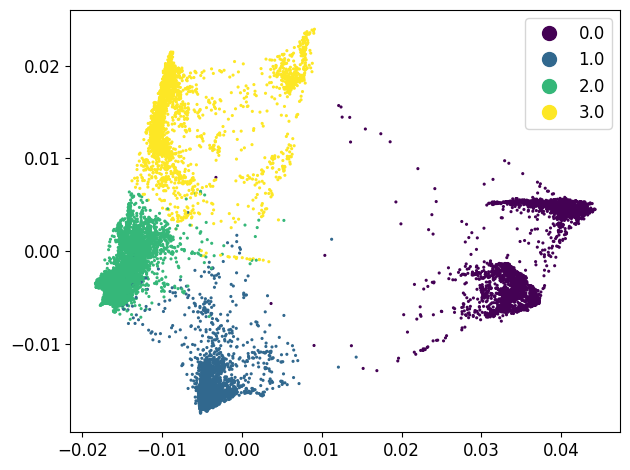

In [70]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['bin'], cmap='viridis')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    1414
2    1274
1     475
dtype: int64
0    1414
2    1274
1     475
Name: cluster, dtype: int64


<Axes: >

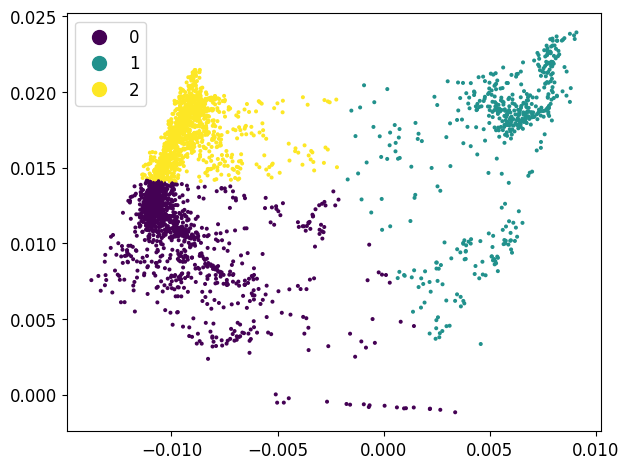

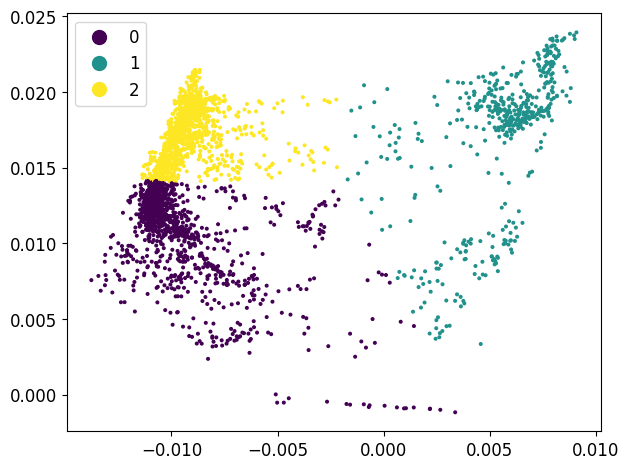

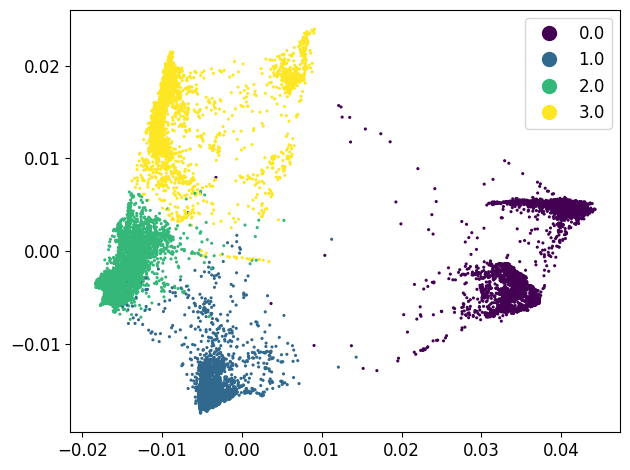

In [71]:
t = 3
bin_adata = adata[adata.obs['bin'] == t].copy()
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bin_adata.obsm['X_phate'])
bin_adata.obs['cluster'] = kmeans.labels_
scprep.plot.scatter2d(bin_adata.obsm['X_phate'], bin_adata.obs['cluster'], cmap='viridis')
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print(cluster_counts)

# Get size of smallest cluster
min_cluster_size = cluster_counts.min() * 3

# Subsample clusters only if they are larger than min_cluster_size
subsampled = []
for cluster in range(n_clusters):
    cluster_data = bin_adata[bin_adata.obs['cluster'] == cluster]
    if len(cluster_data) > min_cluster_size:
        subsampled.append(cluster_data[np.random.choice(len(cluster_data), min_cluster_size, replace=False)])
    else:
        subsampled.append(cluster_data)

# Combine subsampled clusters
bin_subsampled = sc.concat(subsampled)

# Plot the subsampled data
scprep.plot.scatter2d(bin_subsampled.obsm['X_phate'], bin_subsampled.obs['cluster'], cmap='viridis')
print(pd.Series(bin_subsampled.obs['cluster']).value_counts())

# Save the subsampled data for bin 5
subsampled_adata = adata.copy()
subsampled_adata = subsampled_adata[~(subsampled_adata.obs['bin'] == t)].copy() # Remove bin 5
subsampled_adata = sc.concat([subsampled_adata, bin_subsampled]) # Add subsampled bin 5

# Verify the subsampling worked
scprep.plot.scatter2d(subsampled_adata.obsm['X_phate'], subsampled_adata.obs['bin'], cmap='viridis')


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1    4734
0    1996
2    1425
dtype: int64
1    4734
0    1996
2    1425
Name: cluster, dtype: int64


<Axes: >

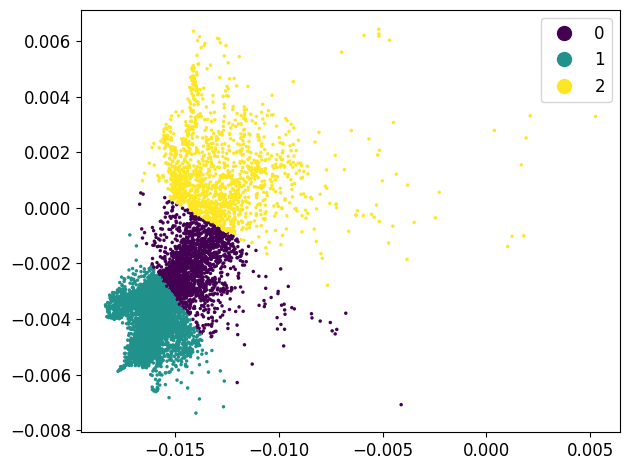

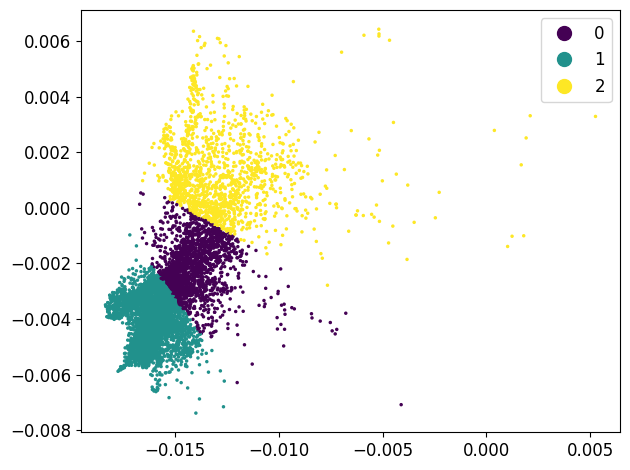

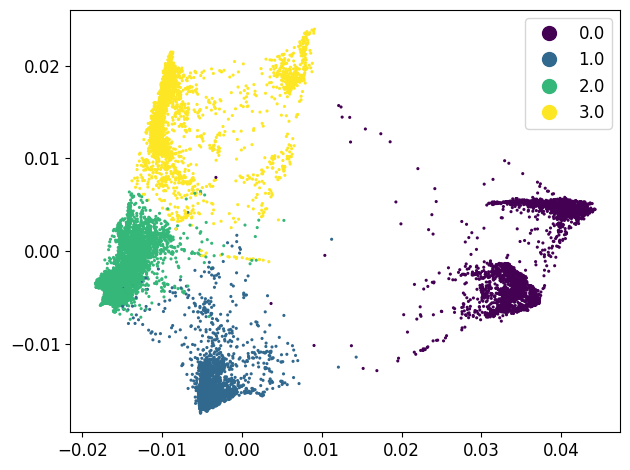

In [72]:
t = 2
bin_subsubsampled_ = subsampled_adata[subsampled_adata.obs['bin'] == t].copy()
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bin_subsubsampled_.obsm['X_phate'])
bin_subsubsampled_.obs['cluster'] = kmeans.labels_
scprep.plot.scatter2d(bin_subsubsampled_.obsm['X_phate'], bin_subsubsampled_.obs['cluster'], cmap='viridis')
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print(cluster_counts)

# Get size of smallest cluster
min_cluster_size = cluster_counts.min() * 5

# Subsample all clusters to the minimum size
subsampled = []
for cluster in range(n_clusters):
    cluster_data = bin_subsubsampled_[bin_subsubsampled_.obs['cluster'] == cluster]
    if len(cluster_data) > min_cluster_size:
        subsampled.append(cluster_data[np.random.choice(len(cluster_data), min_cluster_size, replace=False)])
    else:
        subsampled.append(cluster_data)
# Combine subsampled clusters
bin_subsubsampled_ = sc.concat(subsampled)

# Plot the subsampled data
scprep.plot.scatter2d(bin_subsubsampled_.obsm['X_phate'], bin_subsubsampled_.obs['cluster'], cmap='viridis')
print(pd.Series(bin_subsubsampled_.obs['cluster']).value_counts())

# Update the full dataset
subsampled_adata = subsampled_adata[~(subsampled_adata.obs['bin'] == t)].copy() # Remove bin t
subsampled_adata = sc.concat([subsampled_adata, bin_subsubsampled_]) # Add subsampled bin t

# Verify the subsampling worked
scprep.plot.scatter2d(subsampled_adata.obsm['X_phate'], subsampled_adata.obs['bin'], cmap='viridis')


In [73]:
subsampled_adata.write('../data/balanced_subsampled2.h5ad')

In [74]:
mioflow_df = pd.DataFrame(subsampled_adata.obsm['X_phate'], columns=['d1', 'd2'], index=subsampled_adata.obs.index)
mioflow_df['samples'] = subsampled_adata.obs['bin'].values
# Create a new empty DataFrame to store the subsampled data
subsampled_df = pd.DataFrame()

# Subsample each bin to exactly 500 points
n_samples_per_bin = min(1000, mioflow_df.groupby('samples').size().min())
for bin in range(len(mioflow_df['samples'].unique())):
    bin_df = mioflow_df[mioflow_df['samples'] == bin]
    if len(bin_df) >= n_samples_per_bin:
        sampled = bin_df.sample(n_samples_per_bin, random_state=42)
        subsampled_df = pd.concat([subsampled_df, sampled])
    else:
        subsampled_df = pd.concat([subsampled_df, bin_df])
# Save the balanced dataset
subsampled_df.to_csv('../data/mioflow_balanced_subsampled2.csv')

# Verify the counts
print(subsampled_df['samples'].value_counts())

0.0    1000
1.0    1000
2.0    1000
3.0    1000
Name: samples, dtype: int64


<Axes: xlabel='d1', ylabel='d2'>

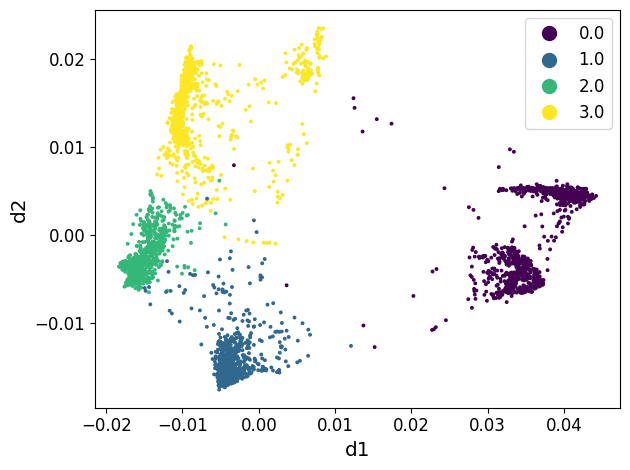

In [75]:
scprep.plot.scatter2d(subsampled_df[['d1', 'd2']], subsampled_df['samples'], cmap='viridis')
